# CODE TO CLASSIFY TRAFFIC SIGNS USING LE-NET ARCHITECTURE IN KERAS

# STEP 0: PROBLEM STATEMENT

- In this case study, you have been provided with images of traffic signs and the goal is to train a Deep Network to classify them
- The dataset contains 43 different classes of images. 
- Classes are as listed below: 

    - ( 0, b'Speed limit (20km/h)') ( 1, b'Speed limit (30km/h)')
    - ( 2, b'Speed limit (50km/h)') ( 3, b'Speed limit (60km/h)')
    - ( 4, b'Speed limit (70km/h)') ( 5, b'Speed limit (80km/h)')
    - ( 6, b'End of speed limit (80km/h)') ( 7, b'Speed limit (100km/h)')
    - ( 8, b'Speed limit (120km/h)') ( 9, b'No passing')
    - (10, b'No passing for vehicles over 3.5 metric tons')
    - (11, b'Right-of-way at the next intersection') (12, b'Priority road')
    - (13, b'Yield') (14, b'Stop') (15, b'No vehicles')
    - (16, b'Vehicles over 3.5 metric tons prohibited') (17, b'No entry')
    - (18, b'General caution') (19, b'Dangerous curve to the left')
    - (20, b'Dangerous curve to the right') (21, b'Double curve')
    - (22, b'Bumpy road') (23, b'Slippery road')
    - (24, b'Road narrows on the right') (25, b'Road work')
    - (26, b'Traffic signals') (27, b'Pedestrians') (28, b'Children crossing')
    - (29, b'Bicycles crossing') (30, b'Beware of ice/snow')
    - (31, b'Wild animals crossing')
    - (32, b'End of all speed and passing limits') (33, b'Turn right ahead')
    - (34, b'Turn left ahead') (35, b'Ahead only') (36, b'Go straight or right')
    - (37, b'Go straight or left') (38, b'Keep right') (39, b'Keep left')
    - (40, b'Roundabout mandatory') (41, b'End of no passing')
    - (42, b'End of no passing by vehicles over 3.5 metric tons')

- The network used is called Le-Net that was presented by Yann LeCun
http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf


Citation

J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011. 

@inproceedings{Stallkamp-IJCNN-2011,
    author = {Johannes Stallkamp and Marc Schlipsing and Jan Salmen and Christian Igel},
    booktitle = {IEEE International Joint Conference on Neural Networks},
    title = {The {G}erman {T}raffic {S}ign {R}ecognition {B}enchmark: A multi-class classification competition},
    year = {2011},
    pages = {1453--1460}
}



# STEP 1: IMPORT LIBRARIES AND DATASET

In [1]:
import warnings
warnings.filterwarnings("ignore")  
# Warning is different from error in a program. If error is encountered, Python program terminates instantly.
# Warning on the other hand is not fatal. It displays certain message but program continues.
# Warnings are issued to alert the user of certain conditions which aren't exactly exceptions.
# Whether to issue a warning message is controlled by the warning filter
# Warnings can be ignored by using the warning filter as ignore   

In [2]:
# import libraries 
import pickle   # Python pickle module is used for serializing and de-serializing a Python object structure.
import seaborn as sns # Import Seaborn for data visualisation and heat plots 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random # Mostly used for random number generations  

In [3]:
# The pickle module implements binary protocols for serializing and de-serializing a Python object structure.
# A .p file is a pickle file created by pickle, a Python module used for converting Python objects to a byte representation for storage on disk or transfer over a network.
with open("./traffic-signs-data/train.p", mode='rb') as training_data: # Opens a file for reading only in binary format. as mode is 'rb'
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [4]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels'] # Validation Dataset is used to avoid the over fitting. 
X_test, y_test = test['features'], test['labels']

In [5]:
X_train.shape # 3 at the end of the result shows that image is coloured i.e it has 3 colour channels 
# X_train has 34799 images where length of the image is 32 pixels and width of the image is 32 pixels and it is coloured 

(34799, 32, 32, 3)

In [6]:
y_train.shape # y_train is just the label 

(34799,)

# STEP 2: IMAGE EXPLORATION

36

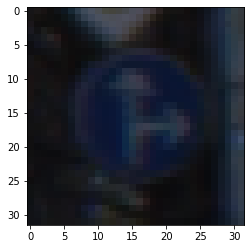

In [7]:
i = 1001 # Taking the index value 
plt.imshow(X_train[i]) # Shown images are not shuffled
y_train[i]

You can change the index and match the image and labels to the list provided above. Do this for 3 more different signs, EXPLORE !

# STEP 3: DATA PEPARATION

In [8]:
## Shuffle the dataset 
from sklearn.utils import shuffle # This is a convenience alias to resample(*arrays, replace=False) to do random permutations of the collections.
X_train, y_train = shuffle(X_train, y_train) 


In [9]:
# Convertting the training images to the gray scale 
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True) #Taking the average of the pixels therefore divided by 3 and keepdim = True to keep the dimensions of the image same 
X_test_gray  = np.sum(X_test/3, axis=3, keepdims=True)
X_validation_gray  = np.sum(X_validation/3, axis=3, keepdims=True) 

# The images are now reduced to one channel 

In [10]:
X_train_gray_norm = (X_train_gray - 128)/128 #128 is the mid value and we will subtract it and the and divide by 128 to normalize the data 
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128


In [11]:
X_train_gray.shape

(34799, 32, 32, 1)

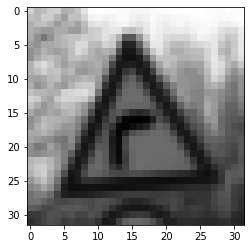

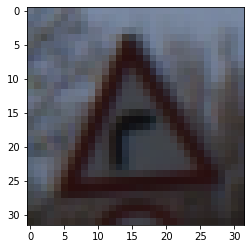

In [12]:
i = 610
plt.imshow(X_train_gray[i].squeeze(), cmap='gray') # .sqeeze is used to squeeze the image and color map is choseen as gray scale 
plt.figure()
plt.imshow(X_train[i]) # .imshow is used to get the image from the dataset 


# STEP 4: MODEL TRAINING

The model consists of the following layers: 

- STEP 1: THE FIRST CONVOLUTIONAL LAYER #1
    - Input = 32x32x1
    - Output = 28x28x6  #depth is 6  as we have 6 kernels 
    - Output = (Input-filter+1)/Stride* => (32-5+1)/1=28
    - Used a 5x5 Filter with input depth of 3 and output depth of 6 
    - Apply a RELU Activation function to the output
    - pooling for input, Input = 28x28x6 and Output = 14x14x6  #this is after down sampling


    * Stride is the amount by which the kernel is shifted when the kernel is passed over the image.

- STEP 2: THE SECOND CONVOLUTIONAL LAYER #2
    - Input = 14x14x6
    - Output = 10x10x16
    - Layer 2: Convolutional layer with Output = 10x10x16
    - Output = (Input-filter+1)/strides => 10 = 14-5+1/1
    - Apply a RELU Activation function to the output
    - Pooling with Input = 10x10x16 and Output = 5x5x16

- STEP 3: FLATTENING THE NETWORK
    - Flattening is converting the matrix into array.
    - Flatten the network with Input = 5x5x16 and Output = 400

- STEP 4: FULLY CONNECTED LAYER
    - Layer 3: Fully Connected layer with Input = 400 and Output = 120
    - Apply a RELU Activation function to the output

- STEP 5: ANOTHER FULLY CONNECTED LAYER
    - Layer 4: Fully Connected Layer with Input = 120 and Output = 84
    - Apply a RELU Activation function to the output

- STEP 6: FULLY CONNECTED LAYER
    - Layer 5: Fully Connected layer with Input = 84 and Output = 43

In [13]:
!pip install keras

In [14]:
# Import train_test_split from scikit library

from keras.models import Sequential #buildin the model in sequential manner 
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout 
# conv2d in for convolution, Maxpooling is for sub  sampling, Dense is to create fully connected ANN, flatten isused to flatten the network 
# Drop out is another regularisation technique and used to drop some neurons.
from keras.optimizers import Adam #importing the adam optimizer 
from keras.callbacks import TensorBoard #using TensorFlow as backend of Keras API

from sklearn.model_selection import train_test_split # train_test_split is to divide the data as training and testing data 


Using TensorFlow backend.


In [15]:
image_shape = X_train_gray[i].shape

In [16]:
cnn_model = Sequential() # Instantiating an Instant from the sequence 

cnn_model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32,32,1))) # this is the first convolution layer 
# The number of filters = depth i.e 6 , kernel size is the filter size, ReLu is the activation function, and input size is provided.
cnn_model.add(AveragePooling2D()) # this is used for downsampling


cnn_model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu')) # this is the Convolution layer second layer 
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten()) # flattening the layer 

cnn_model.add(Dense(units=120, activation='relu')) # Adding the fully connected layer 

cnn_model.add(Dense(units=84, activation='relu'))

cnn_model.add(Dense(units=43, activation = 'softmax')) # used softmax as we need the output to be categorical, we need that to be saturated 


In [17]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])
#loss is used sparse as we have multiple categories !


In [18]:
history = cnn_model.fit(X_train_gray_norm,
                        y_train,
                        batch_size=1000,
                        nb_epoch=100,
                        verbose=1,
                        validation_data = (X_validation_gray_norm,y_validation))

#passing the data to the machine 

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 34799 samples, validate on 4410 samples
Epoch 1/100





34799/34799 [==============================] - 158s 5ms/step - loss: 3.4508 - acc: 0.1087 - val_loss: 3.3114 - val_acc: 0.1712
Epoch 2/100
34799/34799 [==============================] - 19s 539us/step - loss: 2.6312 - acc: 0.3072 - val_loss: 2.3393 - val_acc: 0.3515
Epoch 3/100
34799/34799 [==============================] - 18s 523us/step - loss: 1.6703 - acc: 0.5331 - val_loss: 1.5950 - val_acc: 0.5342
Epoch 4/100
34799/34799 [==============================] - 18s 505us/step - loss: 1.1454 - acc: 0.6752 - val_loss: 1.2318 - val_acc: 0.6372
Epoch 5/100
34799/34799 [==============================] - 18s 529us/step - loss: 0.8791 - acc: 0.7525 - val_loss: 1.0497 - val_acc: 0.7014
Epoch 6/100
34799/34799 [==============================] - 18s 518us/step - loss: 0.7212 - acc: 0.7991 - val_loss: 0.9445 - val_acc: 0.7279
Epoch 7/10

Epoch 44/100
34799/34799 [==============================] - 17s 501us/step - loss: 0.0603 - acc: 0.9866 - val_loss: 0.6253 - val_acc: 0.8624
Epoch 45/100
34799/34799 [==============================] - 17s 494us/step - loss: 0.0569 - acc: 0.9875 - val_loss: 0.6111 - val_acc: 0.8592
Epoch 46/100
34799/34799 [==============================] - 18s 531us/step - loss: 0.0557 - acc: 0.9877 - val_loss: 0.6340 - val_acc: 0.8596
Epoch 47/100
34799/34799 [==============================] - 18s 503us/step - loss: 0.0521 - acc: 0.9895 - val_loss: 0.6455 - val_acc: 0.8619
Epoch 48/100
34799/34799 [==============================] - 17s 499us/step - loss: 0.0506 - acc: 0.9891 - val_loss: 0.6572 - val_acc: 0.8558
Epoch 49/100
34799/34799 [==============================] - 17s 503us/step - loss: 0.0507 - acc: 0.9894 - val_loss: 0.6400 - val_acc: 0.8601
Epoch 50/100
34799/34799 [==============================] - 18s 516us/step - loss: 0.0472 - acc: 0.9905 - val_loss: 0.6672 - val_acc: 0.8553
Epoch 51/100


# STEP 5: MODEL EVALUATION

In [19]:
score = cnn_model.evaluate(X_test_gray_norm, y_test,verbose=0) #passing the data for evaluation
print('Test Accuracy : {:.4f}'.format(score[1])) # passing score[1] as that is the accuracy 

Test Accuracy : 0.8603


In [20]:
history.history.keys() #checking the keys in the history 
#so we have these information for each of the 50 epochs 

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

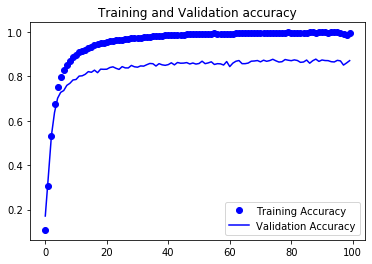

In [21]:
accuracy = history.history['acc'] #fetching the accuracy 
val_accuracy = history.history['val_acc'] #fetching the validation accuracy 
loss = history.history['loss'] #fetching the loss 
val_loss = history.history['val_loss'] #fetching the validation loss 

epochs = range(len(accuracy)) #getting the number of epochs 

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy') # plotting the accuracy for the each epoch 
# 'bo' means that is will plot blue dots 
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy') #plotting validation accuracy 
#b means that it will plot only the blue line 
plt.title('Training and Validation accuracy') #giving title to the graph 
plt.legend()


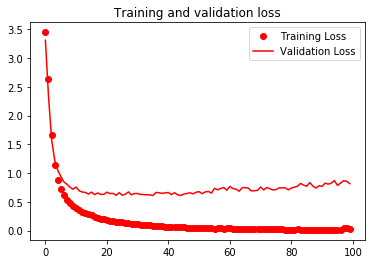

In [22]:
plt.plot(epochs, loss, 'ro', label='Training Loss') #plotting the loss for the each epoch 
# 'ro' means that is will plot red dots 
plt.plot(epochs, val_loss, 'r', label='Validation Loss') #plotting the validation loss
plt.title('Training and validation loss') #Assigning a tittle 
plt.legend()
plt.show()

In [23]:
#get the predictions for the test data
predicted_classes = cnn_model.predict_classes(X_test_gray_norm) 
#get the indices to be plotted
y_true = y_test


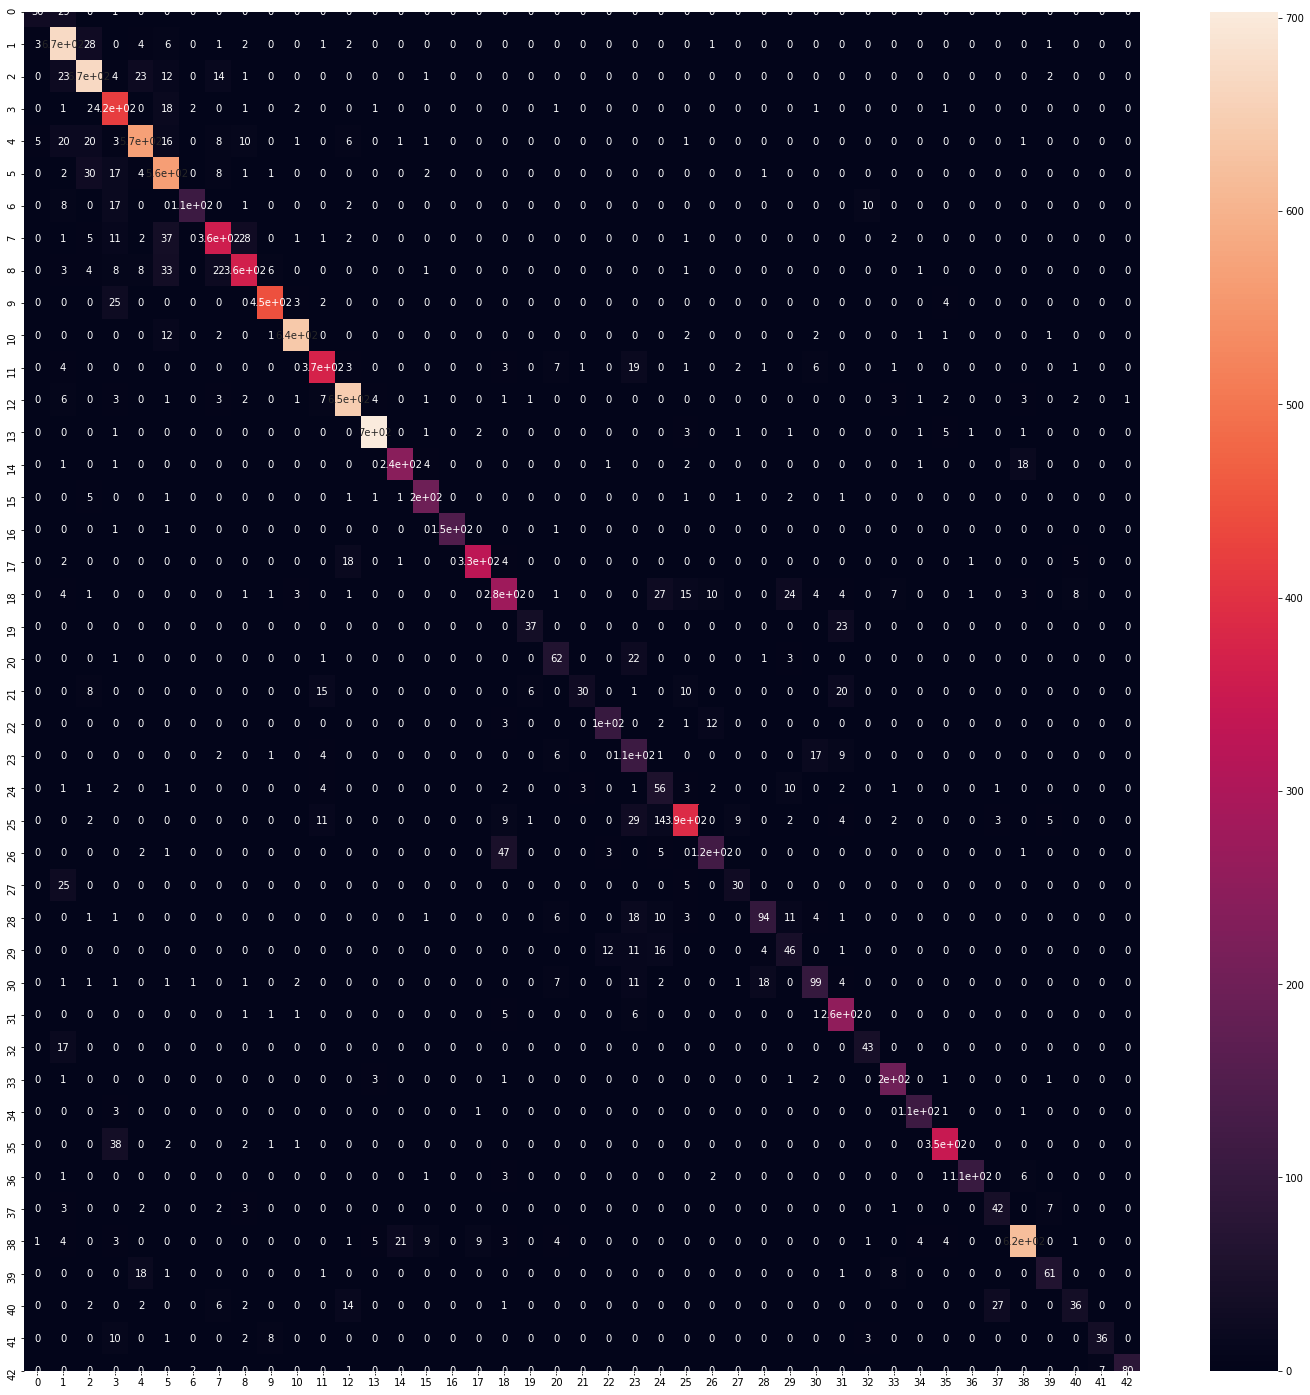

In [24]:
from sklearn.metrics import confusion_matrix 
# using confuscion matrix to get an insight of how many samples are correctly classified and how many mis-classified
cm = confusion_matrix(y_true, predicted_classes) #passing the true classes and the predicted classes 
plt.figure(figsize = (25,25)) #changing the size of the figure 
sns.heatmap(cm, annot=True) #plotting the heatmap using Seaborn

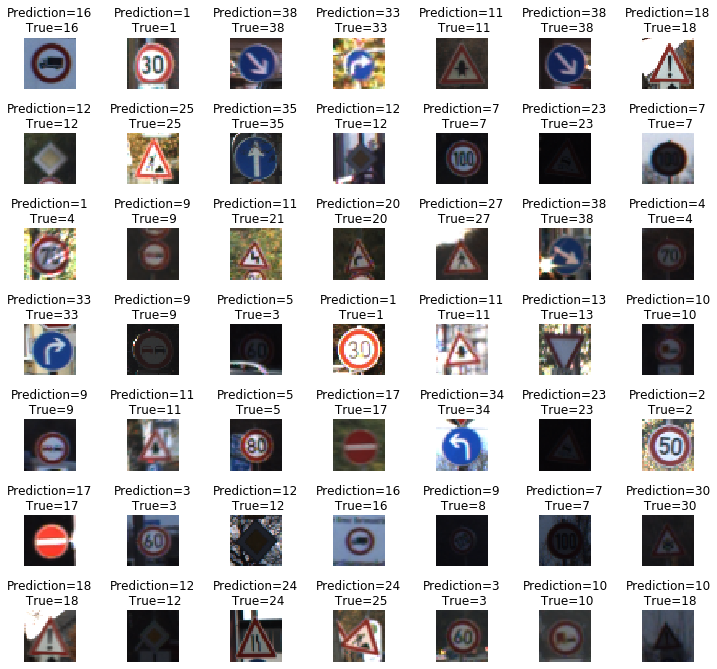

In [25]:
#now we will be plotting the actual images with the true and the predicted label 
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W): # 0 to 49
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction={}\n True={}".format(predicted_classes[i], y_true[i])) #getting the predicted and true classes 
    axes[i].axis('off') #turning the axis of the image off for better visualization 

plt.subplots_adjust(wspace=1) #increasing the space between the images 